<h1><center>Mario A Mujica</center></h1>
<h1><center>CIST 2500: Introduction to Applied Statistics for IS&T</center></h1>
<h1><center>Semester Project - Option 2</center></h1>
<h1><center>Learning How to Use Jupyter Notebook for Statistics</center></h1>

# Chapter 2

# Descriptive Statistics: Tabular and Graphical Displays

## Movies From 2016

In [131]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
from scipy import stats
from scipy.stats import norm
from scipy.stats.distributions import chi2
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf

In [132]:
Movies_2016_2 = pd.read_csv('Movies_2016_2.csv')

In [133]:
Movies_2016_2

,Movie Title,Opening Gross Sales ($ millions),Total Gross Sales ($ millions),Number of Theaters,Weeks in Release
0,Captain America: Civil War,179.14,408.08,4226,20
1,Batman v Superman: Dawn of Justice,166.01,330.36,4256,12
2,Rogue One: A Star Wars Story,155.08,532.18,4157,20
3,Finding Dory,135.06,486.30,4305,25
4,Suicide Squad,133.68,325.10,4255,14
...,...,...,...,...,...
95,Moonlight (2016),0.40,27.85,1564,28
96,Manchester by the Sea,0.26,47.70,1213,23
97,Patriots Day,0.16,31.89,3120,11
98,Fences,0.13,57.68,2368,15


In [134]:
Movies_2016_2.columns = ['Movie Title', 'Opening Gross Sales', 'Total Gross Sales', 'Number of Theaters', 'Weeks in Release']

In [135]:
table = pd.pivot_table(Movies_2016_2,values='Movie Title', index='Opening Gross Sales', columns='Number of Theaters', aggfunc=lambda x: x.value_counts().count(),fill_value='')
table

Number of Theaters,1213,1505,1528,1564,1802,2204,2246,2248,2299,2368,...,4071,4130,4144,4153,4157,4226,4255,4256,4305,4381
Opening Gross Sales,,,,,,,,,,,,,,,,,,,,,
0.12,,,,,1.0,,,,,,...,,,,,,,,,,
0.13,,,,,,,,,,1.0,...,,,,,,,,,,
0.16,,,,,,,,,,,...,,,,,,,,,,
0.26,1.0,,,,,,,,,,...,,,,,,,,,,
0.40,,,,1.0,,,,,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133.68,,,,,,,,,,,...,,,,,,,1.0,,,
135.06,,,,,,,,,,,...,,,,,,,,,1.0,
155.08,,,,,,,,,,,...,,,,,1.0,,,,,


Text(3100, 170, 'Captain America')

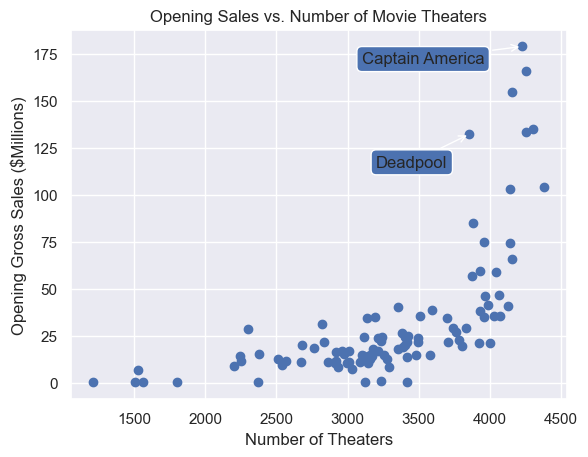

In [136]:
fig, ax = plt.subplots()
scatter = plt.scatter(x=Movies_2016_2['Number of Theaters'], y=Movies_2016_2['Opening Gross Sales'])
plt.title('Opening Sales vs. Number of Movie Theaters')
plt.xlabel('Number of Theaters')
plt.ylabel('Opening Gross Sales ($Millions)')
ax.annotate(text='Deadpool', xy=(3856,132.43), xytext=(3200,115), arrowprops={'arrowstyle': '->'}, bbox={'boxstyle': 'round', 'fc': 'b'})
ax.annotate(text='Captain America', xy=(4226,179.14), xytext=(3100,170), arrowprops={'arrowstyle': '->'}, bbox={'boxstyle': 'round', 'fc': 'b'})


In [137]:
table = pd.pivot_table(Movies_2016_2,values='Movie Title', index='Total Gross Sales', columns='Weeks in Release', aggfunc=lambda x: x.value_counts().count(),fill_value='')
table

Weeks in Release,7,8,9,10,11,12,13,14,15,16,...,18,19,20,21,22,23,24,25,28,46
Total Gross Sales,,,,,,,,,,,,,,,,,,,,,
23.59,,,1.0,,,,,,,,...,,,,,,,,,,
24.25,,,,,,,1.0,,,,...,,,,,,,,,,
25.14,,,,,,,,1.0,,,...,,,,,,,,,,
26.41,1.0,,,,,,,,,,...,,,,,,,,,,
26.59,,,,1.0,,,,,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364.00,,,,,,,,,,,...,,,,,,,1.0,,,
368.38,,,,,,,,,,,...,,,,,,,,1.0,,
408.08,,,,,,,,,,,...,,,1.0,,,,,,,


Text(35, 200, 'Hidden Figures')

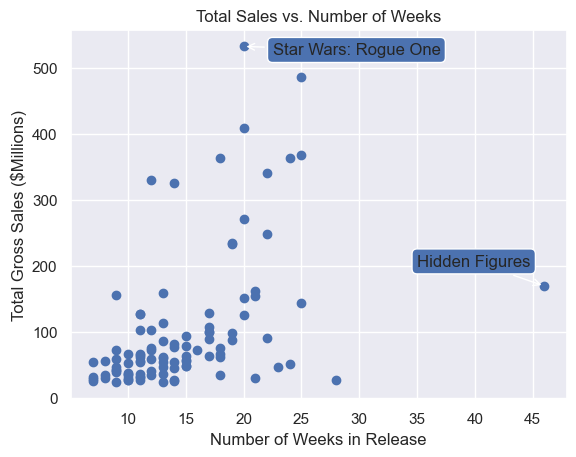

In [138]:
fig, ax = plt.subplots()
scatter = plt.scatter(x=Movies_2016_2['Weeks in Release'], y=Movies_2016_2['Total Gross Sales'])
plt.title('Total Sales vs. Number of Weeks')
plt.xlabel('Number of Weeks in Release')
plt.ylabel('Total Gross Sales ($Millions)')
ax.annotate(text='Star Wars: Rogue One', xy=(20,532.18), xytext=(22.5,520), arrowprops={'arrowstyle': '->'}, bbox={'boxstyle': 'round', 'fc': 'b'})
ax.annotate(text='Hidden Figures', xy=(46,169.61), xytext=(35,200), arrowprops={'arrowstyle': '->'}, bbox={'boxstyle': 'round', 'fc': 'b'})

In [139]:
Superhero_Movies = pd.read_csv('Movies_2016_2b.csv')

In [140]:
Superhero_Movies

,Movie Title,Superhero?,Opening Gross Sales ($ millions),Total Gross Sales ($ millions),Number of Theaters,Weeks in Release
0,Captain America: Civil War,Yes,179.14,408.08,4226,20
1,Batman v Superman: Dawn of Justice,Yes,166.01,330.36,4256,12
2,Rogue One: A Star Wars Story,No,155.08,532.18,4157,20
3,Finding Dory,No,135.06,486.30,4305,25
4,Suicide Squad,Yes,133.68,325.10,4255,14
5,Deadpool,Yes,132.43,363.07,3856,18
6,The Secret Life of Pets,No,104.35,368.38,4381,25
7,The Jungle Book (2016),No,103.26,364.00,4144,24
8,Doctor Strange,Yes,85.06,232.64,3882,19
9,Zootopia,No,75.06,341.27,3959,22


In [141]:
Superhero_Movies.columns = ['Movie Title', 'Superhero?','Opening Gross Sales', 'Total Gross Sales', 'Number of Theaters', 'Weeks in Release']

In [142]:
table = pd.pivot_table(Superhero_Movies,values='Movie Title', index='Superhero?', columns='Opening Gross Sales', aggfunc=lambda x: x.value_counts().count(),fill_value='')
table

Opening Gross Sales,56.63,59.22,59.25,65.77,74.40,75.06,85.06,103.26,104.35,132.43,133.68,135.06,155.08,166.01,179.14
Superhero?,,,,,,,,,,,,,,,
No,1.0,1.0,1.0,,1.0,1.0,,1.0,1.0,,,1.0,1.0,,
Yes,,,,1.0,,,1.0,,,1.0,1.0,,,1.0,1.0


# Chapter 3

# Descriptive Statistics: Numerical Measures

## Movies From 2016

In [143]:
Movies_2016_3 = pd.read_csv('Movies_2016_3.csv')

In [144]:
Movies_2016_3

,Movie Title,Opening Gross Sales ($ millions),Total Gross Sales ($ millions),Number of Theaters,Weeks in Release
0,Rogue One: A Star Wars Story,155.08,532.18,4157,20
1,Finding Dory,135.06,486.30,4305,25
2,Captain America: Civil War,179.14,408.08,4226,20
3,The Secret Life of Pets,104.35,368.38,4381,25
4,The Jungle Book (2016),103.26,364.00,4144,24
...,...,...,...,...,...
95,The Forest,12.74,26.59,2509,10
96,Ben-Hur (2016),11.20,26.41,3084,7
97,The Witch,8.80,25.14,2204,14
98,Bridget Jones's Baby,8.57,24.25,2930,13


In [145]:
Movies_2016_3.columns = ['Movie Title', 'Opening Gross Sales', 'Total Gross Sales', 'Number of Theaters', 'Weeks in Release']

In [146]:
Movies_2016_3 = Movies_2016_3.rename(columns={'Unnamed: 0': 'Movie Title'})
del Movies_2016_3['Movie Title']

In [147]:
print('\t\t\t   mean')
Movies_2016_3.mean()

			   mean


Opening Gross Sales      32.085
Total Gross Sales       103.819
Number of Theaters     3282.360
Weeks in Release         14.730
dtype: float64

In [148]:
print('\t\t\t median')
Movies_2016_3.median()

			 median


Opening Gross Sales      20.775
Total Gross Sales        62.985
Number of Theaters     3285.000
Weeks in Release         13.000
dtype: float64

In [149]:
print('\t\t\t   mode')
Movies_2016_3.mode()

			   mode


,Opening Gross Sales,Total Gross Sales,Number of Theaters,Weeks in Release
0,11.2,23.59,3008.0,11.0
1,NaN,24.25,3416.0,NaN
2,NaN,25.14,4144.0,NaN
3,NaN,26.41,NaN,NaN
4,NaN,26.59,NaN,NaN
...,...,...,...,...
95,NaN,364.00,NaN,NaN
96,NaN,368.38,NaN,NaN
97,NaN,408.08,NaN,NaN
98,NaN,486.30,NaN,NaN


In [150]:
Movies_2016_3.describe()

,Opening Gross Sales,Total Gross Sales,Number of Theaters,Weeks in Release
count,100.000000,100.00000,100.000000,100.000000
mean,32.085000,103.81900,3282.360000,14.730000
std,36.348432,105.53819,668.290167,5.818561
min,0.120000,23.59000,1213.000000,7.000000
25%,12.407500,40.78250,2954.000000,11.000000
50%,20.775000,62.98500,3285.000000,13.000000
75%,35.245000,108.94750,3840.250000,18.000000
max,179.140000,532.18000,4381.000000,46.000000


In [151]:
IQR_OGS = Movies_2016_3['Opening Gross Sales'].quantile(0.75) - Movies_2016_3['Opening Gross Sales'].quantile(0.25)
IQR_TGS = Movies_2016_3['Total Gross Sales'].quantile(0.75) - Movies_2016_3['Total Gross Sales'].quantile(0.25)
IQR_NoT = Movies_2016_3['Number of Theaters'].quantile(0.75) - Movies_2016_3['Number of Theaters'].quantile(0.25)
IQR_WiR = Movies_2016_3['Weeks in Release'].quantile(0.75) - Movies_2016_3['Weeks in Release'].quantile(0.25)

print(f'Opening Gross Sales IQR \t {IQR_OGS:.3f}')
print(f'Total Gross Sales IQR \t\t {IQR_TGS:.3f}')
print(f'Number of Theaters IQR \t\t {IQR_NoT:.3f}')
print(f'Weeks in Release IQR \t\t {IQR_WiR:.3f}')

Opening Gross Sales IQR 	 22.838
Total Gross Sales IQR 		 68.165
Number of Theaters IQR 		 886.250
Weeks in Release IQR 		 7.000


In [152]:
Ll_IQR_OGS = Movies_2016_3['Opening Gross Sales'].quantile(0.25) - (1.5*IQR_OGS)
Ul_IQR_OGS = Movies_2016_3['Opening Gross Sales'].quantile(0.75) + (1.5*IQR_OGS)

Ll_IQR_TGS = Movies_2016_3['Total Gross Sales'].quantile(0.25) - (1.5*IQR_TGS)
Ul_IQR_TGS = Movies_2016_3['Total Gross Sales'].quantile(0.75) + (1.5*IQR_TGS)

Ll_IQR_NoT = Movies_2016_3['Number of Theaters'].quantile(0.25) - (1.5*IQR_NoT)
Ul_IQR_NoT = Movies_2016_3['Number of Theaters'].quantile(0.75) + (1.5*IQR_NoT)

Ll_IQR_WiR = Movies_2016_3['Weeks in Release'].quantile(0.25) - (1.5*IQR_WiR)
Ul_IQR_WiR = Movies_2016_3['Weeks in Release'].quantile(0.75) + (1.5*IQR_WiR)

print('Opening Gross Sales')
print(f'Lower lim IQR: {Ll_IQR_OGS:.3f}\t Upper lim IQR {Ul_IQR_OGS:.3f}')
print()
print('Total Gross Sales')
print(f'Lower lim IQR: {Ll_IQR_TGS:.3f}\t Upper lim IQR {Ul_IQR_TGS:.3f}')
print()
print('Number of Theaters')
print(f'Lower lim IQR: {Ll_IQR_NoT:.3f}\t Upper lim IQR {Ul_IQR_NoT:.3f}')
print()
print('Weeks in Release')
print(f'Lower lim IQR: {Ll_IQR_WiR:.3f}\t Upper lim IQR {Ul_IQR_WiR:.3f}')

Opening Gross Sales
Lower lim IQR: -21.849	 Upper lim IQR 69.501

Total Gross Sales
Lower lim IQR: -61.465	 Upper lim IQR 211.195

Number of Theaters
Lower lim IQR: 1624.625	 Upper lim IQR 5169.625

Weeks in Release
Lower lim IQR: 0.500	 Upper lim IQR 28.500


In [153]:
Ll_Emp_OGS = Movies_2016_3['Opening Gross Sales'].mean() - (3 * Movies_2016_3['Opening Gross Sales'].std())
Ul_Emp_OGS = Movies_2016_3['Opening Gross Sales'].mean() + (3 * Movies_2016_3['Opening Gross Sales'].std())

Ll_Emp_TGS = Movies_2016_3['Total Gross Sales'].mean() - (3 * Movies_2016_3['Total Gross Sales'].std())
Ul_Emp_TGS = Movies_2016_3['Total Gross Sales'].mean() + (3 * Movies_2016_3['Total Gross Sales'].std())

Ll_Emp_NoT = Movies_2016_3['Number of Theaters'].mean() - (3 * Movies_2016_3['Number of Theaters'].std())
Ul_Emp_NoT = Movies_2016_3['Number of Theaters'].mean() + (3 * Movies_2016_3['Number of Theaters'].std())

Ll_Emp_WiR = Movies_2016_3['Weeks in Release'].mean() - (3 * Movies_2016_3['Weeks in Release'].std())
Ul_Emp_WiR = Movies_2016_3['Weeks in Release'].mean() + (3 * Movies_2016_3['Weeks in Release'].std())

print('Opening Gross Sales')
print(f'Lower lim Emp: {Ll_Emp_OGS:.3f}\t Upper lim Emp {Ul_Emp_OGS:.3f}')
print()
print('Total Gross Sales')
print(f'Lower lim Emp: {Ll_Emp_TGS:.3f}\t Upper lim Emp {Ul_Emp_TGS:.3f}')
print()
print('Number of Theaters')
print(f'Lower lim Emp: {Ll_Emp_NoT:.3f}\t Upper lim Emp {Ul_Emp_NoT:.3f}')
print()
print('Weeks in Release')
print(f'Lower lim Emp: {Ll_Emp_WiR:.3f}\t Upper lim Emp {Ul_Emp_WiR:.3f}')

Opening Gross Sales
Lower lim Emp: -76.960	 Upper lim Emp 141.130

Total Gross Sales
Lower lim Emp: -212.796	 Upper lim Emp 420.434

Number of Theaters
Lower lim Emp: 1277.489	 Upper lim Emp 5287.231

Weeks in Release
Lower lim Emp: -2.726	 Upper lim Emp 32.186


<Axes: ylabel='Opening Gross Sales ($Millions)'>

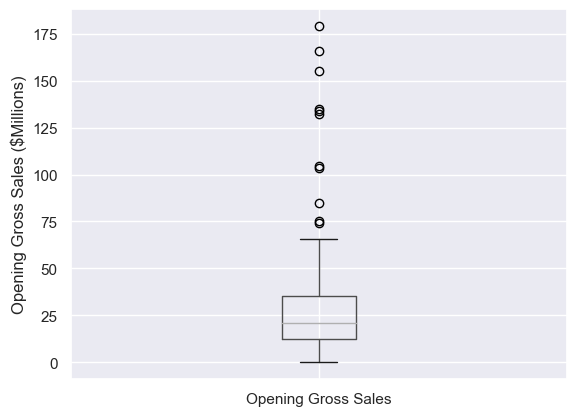

In [154]:
Movies_2016_3.boxplot(column='Opening Gross Sales', ylabel='Opening Gross Sales ($Millions)')

<Axes: ylabel='Total Gross Sales ($Millions)'>

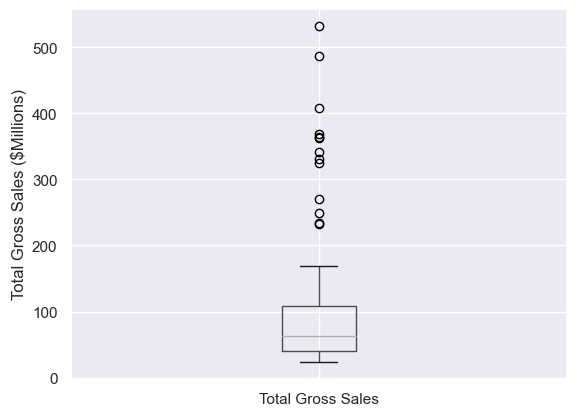

In [155]:
Movies_2016_3.boxplot(column='Total Gross Sales', ylabel='Total Gross Sales ($Millions)')

In [156]:
OGS_OGS = Movies_2016_3['Opening Gross Sales'].corr(Movies_2016_3['Opening Gross Sales'])

TGS_OGS = Movies_2016_3['Total Gross Sales'].corr(Movies_2016_3['Opening Gross Sales'])
TGS_TGS = Movies_2016_3['Total Gross Sales'].corr(Movies_2016_3['Total Gross Sales'])

NoT_OGS = Movies_2016_3['Number of Theaters'].corr(Movies_2016_3['Opening Gross Sales'])
NoT_TGS = Movies_2016_3['Number of Theaters'].corr(Movies_2016_3['Total Gross Sales'])
NoT_NoT = Movies_2016_3['Number of Theaters'].corr(Movies_2016_3['Number of Theaters'])

WiR_OGS = Movies_2016_3['Weeks in Release'].corr(Movies_2016_3['Opening Gross Sales'])
WiR_TGS = Movies_2016_3['Weeks in Release'].corr(Movies_2016_3['Total Gross Sales'])
WiR_NoT = Movies_2016_3['Weeks in Release'].corr(Movies_2016_3['Number of Theaters'])
WiR_WiR = Movies_2016_3['Weeks in Release'].corr(Movies_2016_3['Weeks in Release'])

print('\t\t\tOpening Gross Sales\t  Total Gross Sales\t  Number of Theaters\t  Weeks in Release')
print(f'Opening Gross Sales\t\t{OGS_OGS:.3f}')
print(f'Total Gross Sales\t\t{TGS_OGS:.3f}\t\t\t{TGS_TGS:.3f}')
print(f'Number of Theaters\t\t{NoT_OGS:.3f}\t\t\t{NoT_TGS:.3f}\t\t\t{NoT_NoT:.3f}')
print(f'Weeks in Release\t\t{WiR_OGS:.3f}\t\t\t{WiR_TGS:.3f}\t\t\t{WiR_NoT:.3f}\t\t\t{WiR_WiR:.3f}')

			Opening Gross Sales	  Total Gross Sales	  Number of Theaters	  Weeks in Release
Opening Gross Sales		1.000
Total Gross Sales		0.918			1.000
Number of Theaters		0.630			0.613			1.000
Weeks in Release		0.261			0.474			0.176			1.000


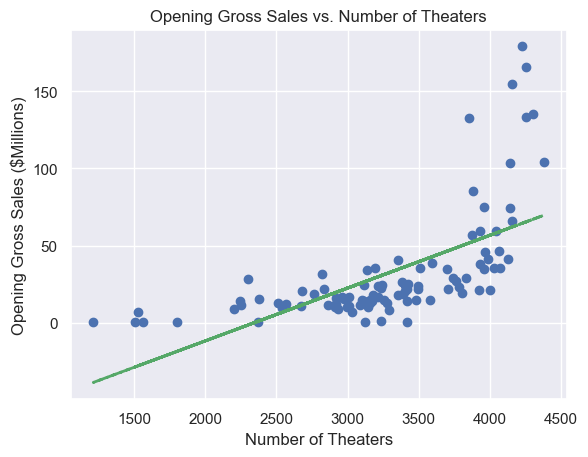

In [157]:
fig, ax = plt.subplots()
scatter = plt.scatter(x=Movies_2016_2['Number of Theaters'], y=Movies_2016_2['Opening Gross Sales'])
plt.title('Opening Gross Sales vs. Number of Theaters')
plt.xlabel('Number of Theaters')
plt.ylabel('Opening Gross Sales ($Millions)')

z = np.polyfit(Movies_2016_2['Number of Theaters'], Movies_2016_2['Opening Gross Sales'], 1)
p = np.poly1d(z)

plt.plot(Movies_2016_2['Number of Theaters'], p(Movies_2016_2['Number of Theaters']), color='g', linewidth=2, linestyle='--')

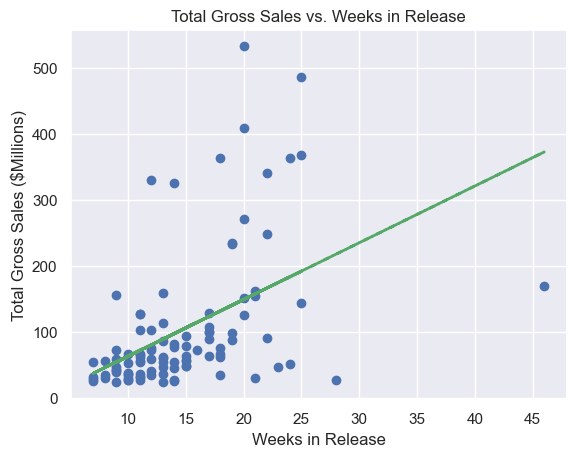

In [158]:
fig, ax = plt.subplots()
scatter = plt.scatter(x=Movies_2016_2['Weeks in Release'], y=Movies_2016_2['Total Gross Sales'])
plt.title('Total Gross Sales vs. Weeks in Release')
plt.xlabel('Weeks in Release')
plt.ylabel('Total Gross Sales ($Millions)')

z = np.polyfit(Movies_2016_2['Weeks in Release'], Movies_2016_2['Total Gross Sales'], 1)
p = np.poly1d(z)

plt.plot(Movies_2016_2['Weeks in Release'], p(Movies_2016_2['Weeks in Release']), color='g', linewidth=2, linestyle='--')

# Chapter 10

# Inference About Means and Proportions with Two Populations

## Class Reaction Time and Typing Speed

In [159]:
Reaction_Typing_10 = pd.read_csv('Reaction_Typing_10.csv')

In [160]:
Reaction_Typing_10

,Submission Time,Submitted,Gamer,Reaction Time 1 (ms),Reaction Time 2 (ms),Typing Speed (wpm)
0,Late,2024-04-17 05:04:54 UTC,Yes,280,249,58
1,Late,2024-04-17 04:41:10 UTC,Yes,311,239,50
2,Late,2024-04-17 01:07:12 UTC,Yes,239,236,69
3,Late,2024-04-17 00:19:38 UTC,Yes,193,196,90
4,Late,2024-04-16 23:05:29 UTC,Yes,234,232,64
5,Late,2024-04-16 22:57:49 UTC,Yes,206,218,48
6,Late,2024-04-16 22:11:27 UTC,Yes,270,290,51
7,Early,2024-04-16 21:39:19 UTC,Yes,317,284,56
8,Early,2024-04-16 21:36:51 UTC,Yes,294,254,41
9,Early,2024-04-16 21:32:17 UTC,Yes,223,216,64


In [161]:
Reaction_Typing_10.columns = ['Submission Time', 'Submitted', 'Gamer', 'Reaction Time 1 (ms)', 'Reaction Time 2 (ms)', 'Typing Speed (wpm)']

In [162]:
Typing_Speed_Late = Reaction_Typing_10['Typing Speed (wpm)'][:7]

print('Typing Speed (WPM) For LATE Submissions')
print('---------------------------------------')
print(f's^2\t{Typing_Speed_Late.var():.6f}')
print(Typing_Speed_Late.describe())

Typing Speed (WPM) For LATE Submissions
---------------------------------------
s^2	218.619048
count     7.000000
mean     61.428571
std      14.785772
min      48.000000
25%      50.500000
50%      58.000000
75%      66.500000
max      90.000000
Name: Typing Speed (wpm), dtype: float64


In [163]:
Typing_Speed_Early = Reaction_Typing_10['Typing Speed (wpm)'][7:]

print('Typing Speed (WPM) For EARLY Submissions')
print('---------------------------------------')
print(f's^2\t{Typing_Speed_Early.var():.6f}')
print(Typing_Speed_Early.describe())

Typing Speed (WPM) For EARLY Submissions
---------------------------------------
s^2	198.060606
count    12.000000
mean     52.666667
std      14.073401
min      31.000000
25%      40.500000
50%      52.500000
75%      63.250000
max      74.000000
Name: Typing Speed (wpm), dtype: float64


Text(0, 0.5, 'Typing Speed (wpm)')

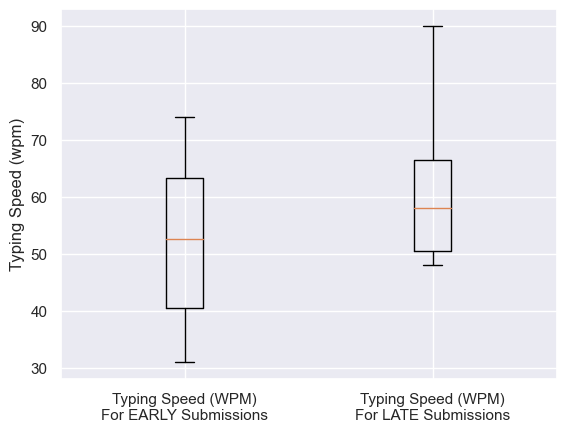

In [164]:
Typing_Speeds = {'Typing Speed (WPM)\nFor EARLY Submissions': Typing_Speed_Early, 
                 'Typing Speed (WPM)\nFor LATE Submissions': Typing_Speed_Late}

fig, ax = plt.subplots()
ax.boxplot(Typing_Speeds.values())
ax.set_xticklabels(Typing_Speeds.keys())
ax.set_ylabel('Typing Speed (wpm)')

In [165]:
s_1_pow2 = Typing_Speed_Late.var()
s_2_pow2 = Typing_Speed_Early.var()
n_1 = 7
n_2 = 12
df = (((s_1_pow2/7)+(s_2_pow2/12))**2)/(((1/(7-1))*((s_2_pow2/7)**2))+((1/(12-1))*((s_2_pow2/12)**2)))
df = 12

SE = math.sqrt((s_1_pow2/7)+(s_2_pow2/12))

t_0_025 = stats.t.ppf(1-0.025,12)

Margin_of_Error = SE * t_0_025

print('Margin of error of the difference in')
print('typing speed for students who submitted the assignment')
print('early vs. those who submitted it late.')
print()
print(f'S.E. = {SE:.3f}')
print(f't_0.025 = {t_0_025:.3f}')
print(f'Margin of Error = {Margin_of_Error:.3f}')

Margin of error of the difference in
typing speed for students who submitted the assignment
early vs. those who submitted it late.

S.E. = 6.909
t_0.025 = 2.179
Margin of Error = 15.054


In [166]:
print('H_0: There Is No Difference In Typing Speed Between The Late And Early Groups.')
print('alpha = 0.05')
print()
print('t-Test: Two-Sample Assuming Unequal Variances')
print()
print(stats.ttest_ind(Typing_Speed_Late, Typing_Speed_Early, equal_var = False))
print()
print('There Is No Evidence To Reject The Null Hypothesis.')

H_0: There Is No Difference In Typing Speed Between The Late And Early Groups.
alpha = 0.05

t-Test: Two-Sample Assuming Unequal Variances

TtestResult(statistic=1.2681597220970047, pvalue=0.22847530127112936, df=12.164358136777114)

There Is No Evidence To Reject The Null Hypothesis.


In [167]:
des_sts_RT1 = Reaction_Typing_10['Reaction Time 1 (ms)'].describe()
RT1_var = Reaction_Typing_10['Reaction Time 1 (ms)'].var()
des_sts_RT2 = Reaction_Typing_10['Reaction Time 2 (ms)'].describe()
RT2_var = Reaction_Typing_10['Reaction Time 2 (ms)'].var()

print('Reaction Time 1 (ms)')
print('--------------------')
print(f's^2\t{RT1_var:.6f}')
print(des_sts_RT1)
print()
print('Reaction Time 2 (ms)')
print('--------------------')
print(f's^2\t{RT2_var:.6f}')
print(des_sts_RT2)

Reaction Time 1 (ms)
--------------------
s^2	2610.263158
count     19.000000
mean     280.473684
std       51.090735
min      193.000000
25%      240.000000
50%      284.000000
75%      313.500000
max      388.000000
Name: Reaction Time 1 (ms), dtype: float64

Reaction Time 2 (ms)
--------------------
s^2	2308.730994
count     19.000000
mean     263.789474
std       48.049256
min      196.000000
25%      234.000000
50%      254.000000
75%      287.000000
max      406.000000
Name: Reaction Time 2 (ms), dtype: float64


Text(0, 0.5, 'Reaction Time (ms)')

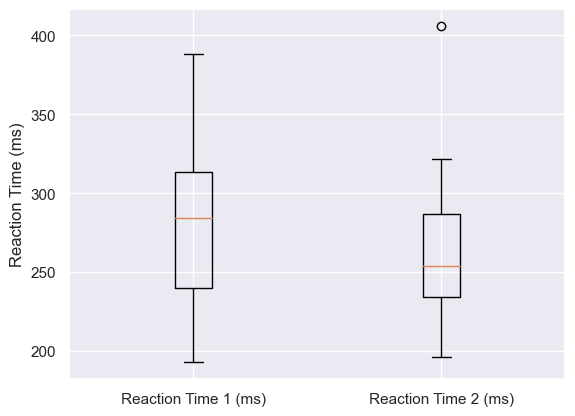

In [168]:
Reaction_Times = {'Reaction Time 1 (ms)': Reaction_Typing_10['Reaction Time 1 (ms)'], 
                  'Reaction Time 2 (ms)': Reaction_Typing_10['Reaction Time 2 (ms)']}

fig, ax = plt.subplots()
ax.boxplot(Reaction_Times.values())
ax.set_xticklabels(Reaction_Times.keys())
ax.set_ylabel('Reaction Time (ms)')

In [169]:
s_1_pow2 = RT1_var
s_2_pow2 = RT2_var
n_1 = 19
n_2 = 19
df = (((s_1_pow2/19)+(s_2_pow2/19))**2)/(((1/(19-1))*((s_2_pow2/19)**2))+((1/(19-1))*((s_2_pow2/19)**2)))
df = 35

SE = math.sqrt((s_1_pow2/19)+(s_2_pow2/19))

t_0_05 = stats.t.ppf(1-0.05,35)

Margin_of_Error = SE * t_0_05

mean1_mean2 = (Reaction_Typing_10['Reaction Time 1 (ms)'].mean()) - (Reaction_Typing_10['Reaction Time 2 (ms)'].mean())

Interval_Estimate = mean1_mean2

print('Interval estimate for the difference in reaction time (for all students)')
print('from the first time they took the test to the second time they took the test,')
print('using a 90% confidence interval.')
print()
print(f'S.E. = {SE:.3f}')
print(f't_0.05 = {t_0_05:.3f}')
print(f'Margin of Error = {Margin_of_Error:.3f}')
print(f'Interval Estimate = {Interval_Estimate:.3f} +/- {Margin_of_Error:.3f}')

Interval estimate for the difference in reaction time (for all students)
from the first time they took the test to the second time they took the test,
using a 90% confidence interval.

S.E. = 16.090
t_0.05 = 1.690
Margin of Error = 27.186
Interval Estimate = 16.684 +/- 27.186


In [170]:
print('H_0: Reaction Time 2 Will Be Greater Than Or Equal To Reaction Time 1.')
print('alpha = 0.10')
print()
print('t-Test: Paired Two Sample for Means')
print()
stats.ttest_rel(Reaction_Typing_10['Reaction Time 1 (ms)'], Reaction_Typing_10['Reaction Time 2 (ms)'])
p = 0.02151450716112305 / 2

print(f'TtestResult(statistic=2.5174062950759706, pvalue={p}, df=18)')
print()
print('This Is Evidence To Reject The Null Hypothesis.')

H_0: Reaction Time 2 Will Be Greater Than Or Equal To Reaction Time 1.
alpha = 0.10

t-Test: Paired Two Sample for Means

TtestResult(statistic=2.5174062950759706, pvalue=0.010757253580561526, df=18)

This Is Evidence To Reject The Null Hypothesis.


In [171]:
print('Test About Differences In Proportion Of Gamers Between Those Who Submitted Late vs. Early.')
print()
print('H_0: There Is No Difference In Proportion Of Gamers Between Those Who Submitted Early vs. Late.')
print()

p1_bar = 7/7
p2_bar = 11/12
n_1 = 7
n_2 = 12

Pooled_Estimator_p_bar = ((n_1*p1_bar)+(n_2*p2_bar))/(n_1+n_2)
SE_of_p1_bar_min_p2_bar = math.sqrt((Pooled_Estimator_p_bar*(1-Pooled_Estimator_p_bar))*((1/n_1)+(1/n_2)))
Test_Statistic_z = (p1_bar-p2_bar)/SE_of_p1_bar_min_p2_bar

print(f'Pooled Estimator = {Pooled_Estimator_p_bar:.3f}')
print(f'SE = {SE_of_p1_bar_min_p2_bar:.3f}')
print(f'Test Statistic = {Test_Statistic_z:.3f}')

x = 1 - norm.cdf(Test_Statistic_z)
p = 2 * x

print(f'p-value = {p}')
print()
print('There Is No Evidence To Reject The Null Hypothesis.')

Test About Differences In Proportion Of Gamers Between Those Who Submitted Late vs. Early.

H_0: There Is No Difference In Proportion Of Gamers Between Those Who Submitted Early vs. Late.

Pooled Estimator = 0.947
SE = 0.106
Test Statistic = 0.785
p-value = 0.43263447115556675

There Is No Evidence To Reject The Null Hypothesis.


# Chapter 11

# Inferences about Population Variances

## Class Reaction Time and Typing Speed

In [172]:
Reaction_Typing_11 = pd.read_csv('Reaction_Typing_11.csv')

In [173]:
Reaction_Typing_11

,Submission Time,Submitted,Gamer,Reaction Time 1 (ms),Reaction Time 2 (ms),Typing Speed (wpm),Reaction Time 1 Submitted Early (ms),Reaction Time 1 Submitted Late (ms),Reaction Time 2 Submitted Early (ms),Reaction Time 2 Submitted Late (ms),Typing Speed Submitted Early (wpm),Typing Speed Submitted Late (wpm)
0,Late,2024-04-17 05:04:54 UTC,Yes,280,249,58,317.0,280.0,284.0,249.0,56.0,58.0
1,Late,2024-04-17 04:41:10 UTC,Yes,311,239,50,294.0,311.0,254.0,239.0,41.0,50.0
2,Late,2024-04-17 01:07:12 UTC,Yes,239,236,69,223.0,239.0,216.0,236.0,64.0,69.0
3,Late,2024-04-17 00:19:38 UTC,Yes,193,196,90,358.0,193.0,322.0,196.0,49.0,90.0
4,Late,2024-04-16 23:05:29 UTC,Yes,234,232,64,241.0,234.0,269.0,232.0,37.0,64.0
5,Late,2024-04-16 22:57:49 UTC,Yes,206,218,48,284.0,206.0,294.0,218.0,31.0,48.0
6,Late,2024-04-16 22:11:27 UTC,Yes,270,290,51,388.0,270.0,406.0,290.0,39.0,51.0
7,Early,2024-04-16 21:39:19 UTC,Yes,317,284,56,316.0,NaN,303.0,NaN,63.0,NaN
8,Early,2024-04-16 21:36:51 UTC,Yes,294,254,41,339.0,NaN,278.0,NaN,50.0,NaN
9,Early,2024-04-16 21:32:17 UTC,Yes,223,216,64,284.0,NaN,242.0,NaN,73.0,NaN


In [174]:
Reaction_Typing_11.columns = ['Submission Time', 'Submitted', 'Gamer', 'Reaction Time 1 (ms)',
                              'Reaction Time 2 (ms)', 'Typing Speed (wpm)','Reaction Time 1 Submitted Early (ms)',
                              'Reaction Time 1 Submitted Late (ms)', 'Reaction Time 2 Submitted Early (ms)', 
                              'Reaction Time 2 Submitted Late (ms)', 'Typing Speed Submitted Early (wpm)', 
                              'Typing Speed Submitted Late (wpm)']

In [175]:
RT1_var = Reaction_Typing_11['Reaction Time 1 (ms)'].var()
print('Reaction Time 1 (ms)')
print('--------------------')
print(f's^2\t{RT1_var:.6f}')
print(Reaction_Typing_11['Reaction Time 1 (ms)'].describe())

Reaction Time 1 (ms)
--------------------
s^2	2610.263158
count     19.000000
mean     280.473684
std       51.090735
min      193.000000
25%      240.000000
50%      284.000000
75%      313.500000
max      388.000000
Name: Reaction Time 1 (ms), dtype: float64


In [176]:
Chi_Square_0_025 = chi2.ppf((1-0.025), df=18)
Chi_Square_0_975 = chi2.ppf((1-0.975), df=18)
s_pow2 = 2610.263158
n = 19
df = 18

lower = math.sqrt(((n-1)*s_pow2)/Chi_Square_0_025)
upper = math.sqrt(((n-1)*s_pow2)/Chi_Square_0_975)

print('Interval estimate for the standard deviation of the Reaction Time 1 data')
print('at the 95% confidence level for all students.')
print()
print(f'Chi-Square_0.025 = {Chi_Square_0_025:.3f}')
print(f'Chi-Square_0.975 = {Chi_Square_0_975:.3f}')
print(f'Interval Estimate: {lower:.3f}ms to {upper:.3f}ms')

Interval estimate for the standard deviation of the Reaction Time 1 data
at the 95% confidence level for all students.

Chi-Square_0.025 = 31.526
Chi-Square_0.975 = 8.231
Interval Estimate: 38.605ms to 75.554ms


In [177]:
print('H_0: The Variance In Reation Time 1 For Those Who Submitted Early Is Less Than Or Equal To')
print('     Those Who Submitted Late.')
print('H_a: The Variance In Reation Time 1 For Those Who Submitted Early Is More Than Those Who Submitted Late.')
print('alpha = 0.10')
print()
print('F-Test Two-Sample for Variances')
print()

RT1SE = Reaction_Typing_11['Reaction Time 1 Submitted Early (ms)']
RT1SL = Reaction_Typing_11['Reaction Time 1 Submitted Late (ms)']

RT1SE_var = RT1SE.var()
RT1SL_var = RT1SL.var()

F = RT1SE_var / RT1SL_var

df1 = 11
df2 = 6

print('Reaction Time 1 Submitted Early (ms)')
print('------------------------------------')
print(f'df\t  {df1}')
print(f'var\t{RT1SE_var:.6f}')
print(RT1SE.describe())
print()
print('Reaction Time 1 Submitted Late (ms)')
print('------------------------------------')
print(f'df\t   {df2}')
print(f'var\t{RT1SL_var:.6f}')
print(RT1SL.describe())
print()

p = 1 - stats.f.cdf(F, df1, df2)

print(f'F\t   {F:.4f}')
print(f'p-value\t   {p:.4f}')
print()
print('There Is No Evidence To Reject The Null Hypothesis.')

H_0: The Variance In Reation Time 1 For Those Who Submitted Early Is Less Than Or Equal To
     Those Who Submitted Late.
H_a: The Variance In Reation Time 1 For Those Who Submitted Early Is More Than Those Who Submitted Late.
alpha = 0.10

F-Test Two-Sample for Variances

Reaction Time 1 Submitted Early (ms)
------------------------------------
df	  11
var	2222.242424
count     12.000000
mean     299.666667
std       47.140666
min      223.000000
25%      279.750000
50%      289.500000
75%      322.500000
max      388.000000
Name: Reaction Time 1 Submitted Early (ms), dtype: float64

Reaction Time 1 Submitted Late (ms)
------------------------------------
df	   6
var	1756.952381
count      7.000000
mean     247.571429
std       41.916016
min      193.000000
25%      220.000000
50%      239.000000
75%      275.000000
max      311.000000
Name: Reaction Time 1 Submitted Late (ms), dtype: float64

F	   1.2648
p-value	   0.4043

There Is No Evidence To Reject The Null Hypothesis.


Text(0, 0.5, 'Reaction Time 1 (ms)')

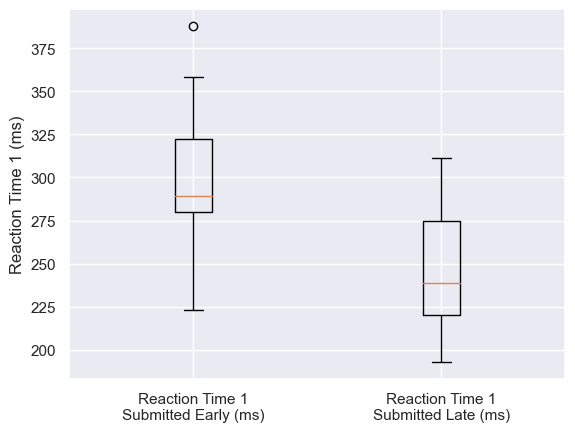

In [178]:
RT1SE = Reaction_Typing_11['Reaction Time 1 Submitted Early (ms)'][:12]
RT1SL = Reaction_Typing_11['Reaction Time 1 Submitted Late (ms)'][:7]

Reaction_Times_Ey_Lt_1 = {'Reaction Time 1\nSubmitted Early (ms)': RT1SE, 
                        'Reaction Time 1\nSubmitted Late (ms)': RT1SL}

fig, ax = plt.subplots()
ax.boxplot(Reaction_Times_Ey_Lt_1.values())
ax.set_xticklabels(Reaction_Times_Ey_Lt_1.keys())
ax.set_ylabel('Reaction Time 1 (ms)')

In [179]:
print('H_0: The Variance In Reation Time 2 For Those Who Submitted Early Is Less Than Or Equal To')
print('     Those Who Submitted Late.')
print('H_a: The Variance In Reation Time 2 For Those Who Submitted Early Is More Than Those Who Submitted Late.')
print('alpha = 0.10')
print()
print('F-Test Two-Sample for Variances')
print()

RT2SE = Reaction_Typing_11['Reaction Time 2 Submitted Early (ms)']
RT2SL = Reaction_Typing_11['Reaction Time 2 Submitted Late (ms)']

RT2SE_var = RT2SE.var()
RT2SL_var = RT2SL.var()

F = RT2SE_var / RT2SL_var

df1 = 11
df2 = 6

print('Reaction Time 2 Submitted Early (ms)')
print('------------------------------------')
print(f'df\t  {df1}')
print(f'var\t{RT2SE_var:.6f}')
print(RT2SE.describe())
print()
print('Reaction Time 2 Submitted Late (ms)')
print('------------------------------------')
print(f'df\t   {df2}')
print(f'var\t {RT2SL_var:.6f}')
print(RT2SL.describe())
print()

p = 1 - stats.f.cdf(F, df1, df2)

print(f'F\t   {F:.4f}')
print(f'p-value\t   {p:.4f}')
print()
print('This Is Evidence To Reject The Null Hypothesis.')

H_0: The Variance In Reation Time 2 For Those Who Submitted Early Is Less Than Or Equal To
     Those Who Submitted Late.
H_a: The Variance In Reation Time 2 For Those Who Submitted Early Is More Than Those Who Submitted Late.
alpha = 0.10

F-Test Two-Sample for Variances

Reaction Time 2 Submitted Early (ms)
------------------------------------
df	  11
var	2605.696970
count     12.000000
mean     279.333333
std       51.046028
min      216.000000
25%      251.000000
50%      273.500000
75%      296.250000
max      406.000000
Name: Reaction Time 2 Submitted Early (ms), dtype: float64

Reaction Time 2 Submitted Late (ms)
------------------------------------
df	   6
var	 837.476190
count      7.000000
mean     237.142857
std       28.939181
min      196.000000
25%      225.000000
50%      236.000000
75%      244.000000
max      290.000000
Name: Reaction Time 2 Submitted Late (ms), dtype: float64

F	   3.1114
p-value	   0.0877

This Is Evidence To Reject The Null Hypothesis.


Text(0, 0.5, 'Reaction Time 2 (ms)')

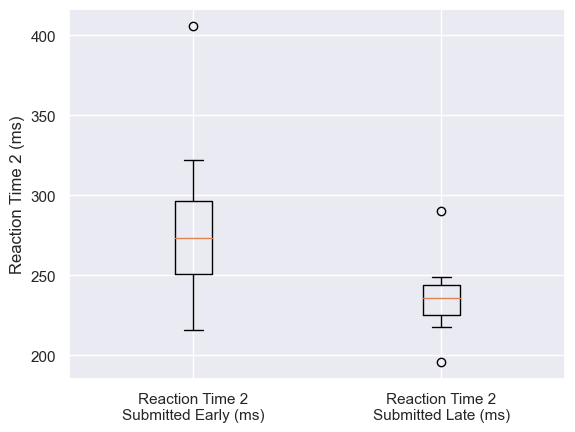

In [180]:
RT2SE = Reaction_Typing_11['Reaction Time 2 Submitted Early (ms)'][:12]
RT2SL = Reaction_Typing_11['Reaction Time 2 Submitted Late (ms)'][:7]

Reaction_Times_Ey_Lt_2 = {'Reaction Time 2\nSubmitted Early (ms)': RT2SE, 
                          'Reaction Time 2\nSubmitted Late (ms)': RT2SL}

fig, ax = plt.subplots()
ax.boxplot(Reaction_Times_Ey_Lt_2.values())
ax.set_xticklabels(Reaction_Times_Ey_Lt_2.keys())
ax.set_ylabel('Reaction Time 2 (ms)')

In [181]:
print('H_0: The Variance In Typing Speed For Those Who Submitted Early Is Equal To Those Who Submitted Late.')
print('H_a: The Variance In Typing Speed For Those Who Submitted Early Is Different From Those Who Submitted Late.')
print('alpha = 0.10')
print()
print('F-Test Two-Sample for Variances')
print()

TSSE = Reaction_Typing_11['Typing Speed Submitted Early (wpm)']
TSSL = Reaction_Typing_11['Typing Speed Submitted Late (wpm)']

TSSE_var = TSSE.var()
TSSL_var = TSSL.var()

F = TSSE_var / TSSL_var

df1 = 12
df2 = 6

print('Typing Speed Submitted Early (wpm)')
print('------------------------------------')
print(f'df\t {df1}')
print(f'var\t{TSSE_var:.6f}')
print(TSSE.describe())
print()
print('Typing Speed Submitted Late (wpm)')
print('------------------------------------')
print(f'df\t  {df2}')
print(f'var\t{TSSL_var:.6f}')
print(TSSL.describe())
print()

p = 1 - stats.f.cdf(F, df1, df2)

print(f'F\t   {F:.4f}')
print(f'p-value\t   {p:.4f}')
print()
print('There Is No Evidence To Reject The Null Hypothesis.')

H_0: The Variance In Typing Speed For Those Who Submitted Early Is Equal To Those Who Submitted Late.
H_a: The Variance In Typing Speed For Those Who Submitted Early Is Different From Those Who Submitted Late.
alpha = 0.10

F-Test Two-Sample for Variances

Typing Speed Submitted Early (wpm)
------------------------------------
df	 12
var	257.076923
count    13.000000
mean     55.076923
std      16.033619
min      31.000000
25%      41.000000
50%      55.000000
75%      64.000000
max      84.000000
Name: Typing Speed Submitted Early (wpm), dtype: float64

Typing Speed Submitted Late (wpm)
------------------------------------
df	  6
var	218.619048
count     7.000000
mean     61.428571
std      14.785772
min      48.000000
25%      50.500000
50%      58.000000
75%      66.500000
max      90.000000
Name: Typing Speed Submitted Late (wpm), dtype: float64

F	   1.1759
p-value	   0.4440

There Is No Evidence To Reject The Null Hypothesis.


Text(0, 0.5, 'Typing Speed (wpm)')

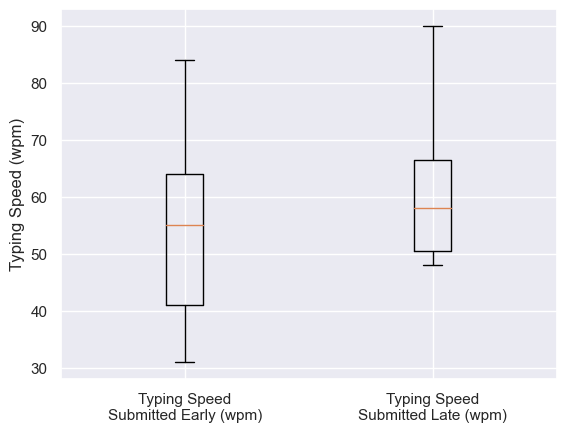

In [182]:
TSSE = Reaction_Typing_11['Typing Speed Submitted Early (wpm)'][:13]
TSSL = Reaction_Typing_11['Typing Speed Submitted Late (wpm)'][:7]

Typing_Speeds = {'Typing Speed\nSubmitted Early (wpm)': TSSE, 
                 'Typing Speed\nSubmitted Late (wpm)': TSSL}

fig, ax = plt.subplots()
ax.boxplot(Typing_Speeds.values())
ax.set_xticklabels(Typing_Speeds.keys())
ax.set_ylabel('Typing Speed (wpm)')

# Chapter 12

# Tests of Goodness of Fit, Independence, and Multiple Proportions

## Student Winter Attitudes

In [183]:
Student_Winter_Attitudes_12 = pd.read_csv('Student_Winter_Attitudes_12.csv')

In [184]:
Student_Winter_Attitudes_12

,Student,Semester Standing,Level,Winter Attitudes
0,1,2,Junior,Meh
1,2,9,Senior,Meh
2,3,4,Junior,Meh
3,4,3,Junior,Meh
4,5,6,Senior,Love
5,6,4,Junior,Meh
6,7,3,Junior,Meh
7,8,1,Junior,Meh
8,9,5,Senior,Love
9,10,4,Junior,Love


In [185]:
Student_Winter_Attitudes_12.columns = ['Student', 'Semester Standing', 'Level', 'Winter Attitudes']

In [186]:

SWA_piv_table = pd.pivot_table(Student_Winter_Attitudes_12,values='Student', index='Winter Attitudes', 
                       columns='Level', fill_value='', aggfunc=lambda x: x.value_counts().count())
SWA_piv_table

Level,Junior,Senior
Winter Attitudes,,
Hate,,1
Love,2.0,5
Meh,9.0,2


In [187]:
Grand_Total_Junior = 2+9
Grand_Total_Senior = 1+5+2
Grand_Total = Grand_Total_Junior+Grand_Total_Senior
Grand_Total_Hate = 1
Grand_Total_Love = 2+5
Grand_Total_Meh = 9+2

tot_pro_j = Grand_Total_Junior/Grand_Total
tot_pro_s = Grand_Total_Senior/Grand_Total
ht_j = Grand_Total_Hate*tot_pro_j
lv_j = Grand_Total_Love*tot_pro_j
mh_j = Grand_Total_Meh*tot_pro_j
ht_s = Grand_Total_Hate*tot_pro_s
lv_s = Grand_Total_Love*tot_pro_s
mh_s = Grand_Total_Meh*tot_pro_s

In [188]:
print('EXPECTED CONTINGENCY TABLE')
print('\t\t   LEVEL')
print('WINTER ATTITUDES  Junior\tSenior')
print(f'Hate\t\t  {ht_j:.4}\t{ht_s:.4}\t\t{ht_j+ht_s}')
print(f'Love\t\t  {lv_j:.5}\t{lv_s:.5}\t\t{lv_j+lv_s}')
print(f'Meh\t\t  {mh_j:.5}\t{mh_s:.5}\t\t{mh_j+mh_s}')
print(f'TOTAL PROPORTION  {tot_pro_j:.4}\t{tot_pro_s:.4}\t\t{tot_pro_j+tot_pro_s}')

EXPECTED CONTINGENCY TABLE
		   LEVEL
WINTER ATTITUDES  Junior	Senior
Hate		  0.5789	0.4211		1.0
Love		  4.0526	2.9474		7.0
Meh		  6.3684	4.6316		11.0
TOTAL PROPORTION  0.5789	0.4211		1.0


In [189]:
print('WINTER ATTITUDES   LEVEL   f_ij\te_ij\tf_ij - e_ij\t(f_ij - e_ij)^2\t   (f_ij - e_ij)^2/e_ij')
print(f'Hate\tJunior\t   0\t   0.5789\t{0-0.5789:.4}\t\t{(0-0.5789)**2:.4}\t\t   {((0-0.5789)**2)/0.5789:.4}')
print(f'Hate\tSenior\t   1\t   0.4211\t{1-0.4211:.4}\t\t{(1-0.4211)**2:.4}\t\t   {((1-0.4211)**2)/0.4211:.4}')
print(f'Love\tJunior\t   2\t   4.0526\t{2-4.0526:.4}\t\t{(2-4.0526)**2:.4}\t\t   {((2-4.0526)**2)/4.0526:.4}')
print(f'Love\tSenior\t   5\t   2.9474\t{5-2.9474:.4}\t\t{(5-2.9474)**2:.4}\t\t   {((5-2.9474)**2)/2.9474:.4}')
print(f'Meh\tJunior\t   9\t   6.3684\t{9-6.3684:.4}\t\t{(9-6.3684)**2:.4}\t\t   {((9-6.3684)**2)/6.3684:.4}')
print(f'Meh\tSenior\t   2\t   4.6316\t{2-4.6316:.4}\t\t{(2-4.6316)**2:.4}\t\t   {((2-4.6316)**2)/4.6316:.4}')
print()
X_pow2 = 0.5789+0.7958+1.04+1.429+1.087+1.495
df = (3-1)*(2-1)
p = 1 - stats.chi2.cdf(X_pow2, df=df)
print(f'X^2 = {X_pow2:.4}')
print(f'df = {(3-1)*(2-1)}')
print(f'p-value = {p:.4}')

WINTER ATTITUDES   LEVEL   f_ij	e_ij	f_ij - e_ij	(f_ij - e_ij)^2	   (f_ij - e_ij)^2/e_ij
Hate	Junior	   0	   0.5789	-0.5789		0.3351		   0.5789
Hate	Senior	   1	   0.4211	0.5789		0.3351		   0.7958
Love	Junior	   2	   4.0526	-2.053		4.213		   1.04
Love	Senior	   5	   2.9474	2.053		4.213		   1.429
Meh	Junior	   9	   6.3684	2.632		6.925		   1.087
Meh	Senior	   2	   4.6316	-2.632		6.925		   1.495

X^2 = 6.426
df = 2
p-value = 0.04024


In [190]:
df = 2
alpha = 0.05
X_pow2_0_05 = chi2.ppf(1-0.05, 2)
'Proportion of Junior Students Who Hate Winter (p1_bar)'
p1_bar = 0/11
'Proportion of Junior Students Who Love Winter (p2_bar)'
p2_bar = 2/11
'Proportion of Junior Students Who Are Meh About Winter (p3_bar)'
p3_bar = 9/11

cv_ij_12 = math.sqrt(X_pow2_0_05)*math.sqrt(((p1_bar*(1-p1_bar))/1)+((p2_bar*(1-p2_bar))/7))
cv_ij_13 = math.sqrt(X_pow2_0_05)*math.sqrt(((p1_bar*(1-p1_bar))/1)+((p3_bar*(1-p3_bar))/11))
cv_ij_23 = math.sqrt(X_pow2_0_05)*math.sqrt(((p2_bar*(1-p2_bar))/7)+((p3_bar*(1-p3_bar))/11))

print('Pairwise Comparison\t|pi_bar - pj_bar|\tCV_ij\t\tSignificance')
print(f'p1_bar vs p2_bar\t\t{abs(p1_bar-p2_bar):.4}\t\t{cv_ij_12:.4}\t\tDo Not Reject Null')
print(f'p1_bar vs p3_bar\t\t{abs(p1_bar-p3_bar):.4}\t\t{cv_ij_13:.4}\t\tReject Null')
print(f'p2_bar vs p3_bar\t\t{abs(p2_bar-p3_bar):.4}\t\t{cv_ij_23:.4}\t\tReject Null')

Pairwise Comparison	|pi_bar - pj_bar|	CV_ij		Significance
p1_bar vs p2_bar		0.1818		0.3568		Do Not Reject Null
p1_bar vs p3_bar		0.8182		0.2847		Reject Null
p2_bar vs p3_bar		0.6364		0.4565		Reject Null


In [191]:
print('A Chi-square Test of Independance was performed to examine the relation between level and winter attitudes.\nThe relation between these variables was significant, χ2 (2, N = 19) = 6.43, p = 0.04.\nThe Marascuilo Pairwise Comparison Procedure showed that the proportion of students with junior class standing\ndiffer between all three attitudes, with the highest percentage of junior students holding meh attitude\nabout winter compared to senior students who predominantly love winter.')

A Chi-square Test of Independance was performed to examine the relation between level and winter attitudes.
The relation between these variables was significant, χ2 (2, N = 19) = 6.43, p = 0.04.
The Marascuilo Pairwise Comparison Procedure showed that the proportion of students with junior class standing
differ between all three attitudes, with the highest percentage of junior students holding meh attitude
about winter compared to senior students who predominantly love winter.


# Chapter 13

# Experimental Design and Analysis of Variance

## Different Types of M&Ms

In [192]:
Types_of_MnMs_13 = pd.read_csv('Types_of_MnMs_13.csv')

In [193]:
Types_of_MnMs_13

,Regular M&Ms In A Bag,Peanut M&Ms In A Bag,PB M&Ms In A Bag,Blues In A Regular Bag,Blues In A Peanut Bag,Blues In A PB Bag
0,16,10,14,2,7,3
1,15,14,19,2,4,3
2,14,10,19,3,7,2
3,16,15,15,1,6,2
4,16,11,12,1,6,0
5,14,15,12,1,7,1
6,15,13,18,0,7,3
7,16,15,14,2,5,2
8,14,12,16,0,5,0
9,16,13,15,1,7,0


In [194]:
Types_of_MnMs_13.columns = ['Regular M&Ms In A Bag', 'Peanut M&Ms In A Bag', 'PB M&Ms In A Bag',
                            'Blues In A Regular Bag', 'Blues In A Peanut Bag', 'Blues In A PB Bag']

In [195]:
R_in_Bg = Types_of_MnMs_13['Regular M&Ms In A Bag']
P_in_Bg = Types_of_MnMs_13['Peanut M&Ms In A Bag']
PB_in_Bg = Types_of_MnMs_13['PB M&Ms In A Bag']
Bls_in_R = Types_of_MnMs_13['Blues In A Regular Bag']
Bls_in_P = Types_of_MnMs_13['Blues In A Peanut Bag']
Bls_in_PB = Types_of_MnMs_13['Blues In A PB Bag']

In [196]:
print('Differences in the number of M&Ms in a bag between the different types of M&Ms\n(regular, peanut, and peanut butter (PB)).')
print()
print('Anova: Single Factor')
print()

R_in_Bg_var = R_in_Bg.var()
P_in_Bg_var = P_in_Bg.var()
PB_in_Bg_var = PB_in_Bg.var()

print('Regular M&Ms In A Bag')
print('---------------------')
print(f'var\t  {R_in_Bg_var:.6f}')
print(R_in_Bg.describe())
print()
print('Peanut M&Ms In A Bag')
print('--------------------')
print(f'var\t  {P_in_Bg_var:.6f}')
print(P_in_Bg.describe())
print()
print('PB M&Ms In A Bag')
print('----------------')
print(f'var\t  {PB_in_Bg_var:.6f}')
print(PB_in_Bg.describe())
print()

fvalue, pvalue = f_oneway(R_in_Bg, P_in_Bg, PB_in_Bg)

df_B = 3 - 1
df_W = 75 - 3

x_bar = (15.36 + 12.84 + 15.4) / 3
n_i_123 = 25
SSTR = (n_i_123*(15.36 - x_bar)**2) + (n_i_123*(12.84 - x_bar)**2) + (n_i_123*(15.40 - x_bar)**2)
MSTR = SSTR / (df_B)
SSE = ((n_i_123 - 1)*2.24) + ((n_i_123 - 1)*3.306667) + ((n_i_123 - 1)*7.583333)
MSE = SSE / (df_W)

print('ANOVA')
print('Source of Variation\tSS\t  df\tMS\tF\tp-value')
print(f'Between Groups\t\t{SSTR:.5}\t  {df_B}\t{MSTR:.4}\t{fvalue:.4}\t{pvalue:.4}')
print(f'Within Groups\t\t{SSE:.5}\t  {df_W}\t{MSE:.4}')
print(f'Total\t\t\t{SSTR+SSE:.5}\t  {df_B+df_W}\t')

Differences in the number of M&Ms in a bag between the different types of M&Ms
(regular, peanut, and peanut butter (PB)).

Anova: Single Factor

Regular M&Ms In A Bag
---------------------
var	  2.240000
count    25.000000
mean     15.360000
std       1.496663
min      13.000000
25%      14.000000
50%      15.000000
75%      16.000000
max      21.000000
Name: Regular M&Ms In A Bag, dtype: float64

Peanut M&Ms In A Bag
--------------------
var	  3.306667
count    25.000000
mean     12.840000
std       1.818424
min      10.000000
25%      11.000000
50%      13.000000
75%      14.000000
max      15.000000
Name: Peanut M&Ms In A Bag, dtype: float64

PB M&Ms In A Bag
----------------
var	  7.583333
count    25.000000
mean     15.400000
std       2.753785
min      12.000000
25%      13.000000
50%      15.000000
75%      18.000000
max      20.000000
Name: PB M&Ms In A Bag, dtype: float64

ANOVA
Source of Variation	SS	  df	MS	F	p-value
Between Groups		107.55	  2	53.77	12.29	2.566e-05
Within Gr

In [197]:
Bon_Corr = 0.05 / 3

num_RP = R_in_Bg.mean() - P_in_Bg.mean()
num_RPB = R_in_Bg.mean() - PB_in_Bg.mean()
num_PPB = P_in_Bg.mean() - PB_in_Bg.mean()

denom_RP = math.sqrt(MSE*((1/n_i_123)+(1/n_i_123)))
denom_RPB = math.sqrt(MSE*((1/n_i_123)+(1/n_i_123)))
denom_PPB = math.sqrt(MSE*((1/n_i_123)+(1/n_i_123)))

t_RP = num_RP / denom_RP
t_RPB = num_RPB / denom_RPB
t_PPB = num_PPB / denom_PPB

p_RP = (stats.t.sf(t_RP, df=df_W)) * 2
p_RPB = (stats.t.sf(abs(t_RPB), df=df_W)) * 2
p_PPB = (stats.t.sf(abs(t_PPB), df=df_W)) * 2

print('Fisher\'s LSD Table')
print('-------------------')
print(f'\t\t  MSE: {MSE:.4}')
print(f'\t\t   df: {df_W}')
print(f'Bonderroni Correction: {Bon_Corr:.4}')
print()
print('\t\t\tNum\tDemom\t  t\t  p-value\tSignificant?')
print(f'Regular vs. Peanut\t{num_RP:.4}\t{denom_RP:.4}\t  {t_RP:.4}   {p_RP:.4}\tYes')
print(f'Regular vs. PB\t       {num_RPB:.4}\t{denom_RPB:.4}\t {t_RPB:.4}  {p_RPB:.4}\tNo')
print(f'Peanut vs. PB\t       {num_PPB:.4}\t{denom_PPB:.4}\t {t_PPB:.4}   {p_PPB:.4}\tYes')

Fisher's LSD Table
-------------------
		  MSE: 4.377
		   df: 72
Bonderroni Correction: 0.01667

			Num	Demom	  t	  p-value	Significant?
Regular vs. Peanut	2.52	0.5917	  4.259   6.117e-05	Yes
Regular vs. PB	       -0.04	0.5917	 -0.0676  0.9463	No
Peanut vs. PB	       -2.56	0.5917	 -4.326   4.801e-05	Yes


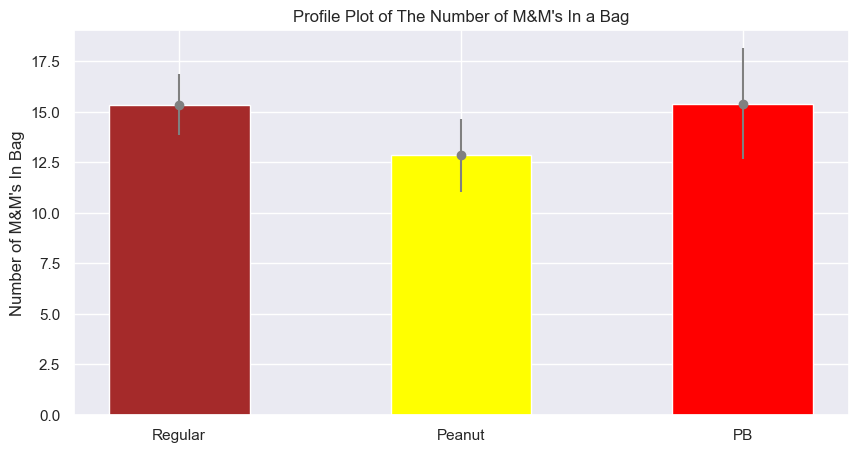


An analysis of variance showed that the effect of type of M&M's was significant, F(2,72) = 12.3, p < 0.001,
on the number of M&M's in a bag. Post hoc analyses using Fisher's LSD indicated that peanut M&M's
had significantly fewer candies in the bag (M = 12.84, SD = 1.82) compared to regular M&M's
(M = 15.36, SD = 1.50) and the peanut butter (PB) M&M's (M = 15.40, SD = 2.75).


In [198]:
data = {'Regular':R_in_Bg.mean(), 'Peanut':P_in_Bg.mean(), 'PB':PB_in_Bg.mean()}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(courses[0], values[0], color ='brown', width = 0.5)
plt.bar(courses[1], values[1], color ='yellow', width = 0.5)
plt.bar(courses[2], values[2], color ='red', width = 0.5)



std_R = 1.496663
std_P = 1.818424
std_PB = 2.753785

plt.errorbar(courses[0], values[0], yerr=std_R, fmt="o", color="grey")
plt.errorbar(courses[1], values[1], yerr=std_P, fmt="o", color="grey")
plt.errorbar(courses[2], values[2], yerr=std_PB, fmt="o", color="grey")

plt.ylabel('Number of M&M\'s In Bag')
plt.title('Profile Plot of The Number of M&M\'s In a Bag')
plt.show()

print()
print('An analysis of variance showed that the effect of type of M&M\'s was significant, F(2,72) = 12.3, p < 0.001,')
print('on the number of M&M\'s in a bag. Post hoc analyses using Fisher\'s LSD indicated that peanut M&M\'s')
print('had significantly fewer candies in the bag (M = 12.84, SD = 1.82) compared to regular M&M\'s')
print('(M = 15.36, SD = 1.50) and the peanut butter (PB) M&M\'s (M = 15.40, SD = 2.75).')

In [199]:
print('Differences in the number of blue candies in a bag between the different types of M&Ms\n(regular, peanut, and peanut butter (PB)).')
print()
print('Anova: Single Factor')
print()

Bls_in_R_var = Bls_in_R.var()
Bls_in_P_var = Bls_in_P.var()
Bls_in_PB_var = Bls_in_PB.var()

print('Regular M&Ms In A Bag')
print('---------------------')
print(f'var\t  {Bls_in_R_var:.6f}')
print(Bls_in_R.describe())
print()
print('Peanut M&Ms In A Bag')
print('--------------------')
print(f'var\t  {Bls_in_P_var:.6f}')
print(Bls_in_P.describe())
print()
print('PB M&Ms In A Bag')
print('----------------')
print(f'var\t  {Bls_in_PB_var:.6f}')
print(Bls_in_PB.describe())
print()

fvalue, pvalue = f_oneway(Bls_in_R, Bls_in_P, Bls_in_PB)

df_B = 3 - 1
df_W = 75 - 3

x_bar = (2.40 + 5.08 + 1.72) / 3
n_i_123 = 25
SSTR = (n_i_123*(2.40 - x_bar)**2) + (n_i_123*(5.08 - x_bar)**2) + (n_i_123*(1.72 - x_bar)**2)
MSTR = SSTR / (df_B)
SSE = ((n_i_123 - 1)*1.916667) + ((n_i_123 - 1)*2.660000) + ((n_i_123 - 1)*1.376667)
MSE = SSE / (df_W)

print('ANOVA')
print('Source of Variation\tSS\t  df\tMS\tF\tp-value')
print(f'Between Groups\t\t{SSTR:.5}\t  {df_B}\t{MSTR:.4}\t{fvalue:.4}\t{pvalue:.4}')
print(f'Within Groups\t\t{SSE:.5}\t  {df_W}\t{MSE:.4}')
print(f'Total\t\t\t{SSTR+SSE:.5}\t  {df_B+df_W}\t')

Differences in the number of blue candies in a bag between the different types of M&Ms
(regular, peanut, and peanut butter (PB)).

Anova: Single Factor

Regular M&Ms In A Bag
---------------------
var	  1.916667
count    25.000000
mean      2.400000
std       1.384437
min       0.000000
25%       2.000000
50%       2.000000
75%       3.000000
max       5.000000
Name: Blues In A Regular Bag, dtype: float64

Peanut M&Ms In A Bag
--------------------
var	  2.660000
count    25.000000
mean      5.080000
std       1.630951
min       2.000000
25%       4.000000
50%       5.000000
75%       7.000000
max       7.000000
Name: Blues In A Peanut Bag, dtype: float64

PB M&Ms In A Bag
----------------
var	  1.376667
count    25.000000
mean      1.720000
std       1.173314
min       0.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       3.000000
Name: Blues In A PB Bag, dtype: float64

ANOVA
Source of Variation	SS	  df	MS	F	p-value
Between Groups		157.79	  2	78.89	39.76	2.333e-1

In [200]:
Bon_Corr = 0.05 / 3

num_RP = Bls_in_R.mean() - Bls_in_P.mean()
num_RPB = Bls_in_R.mean() - Bls_in_PB.mean()
num_PPB = Bls_in_P.mean() - Bls_in_PB.mean()

denom_RP = math.sqrt(MSE*((1/n_i_123)+(1/n_i_123)))
denom_RPB = math.sqrt(MSE*((1/n_i_123)+(1/n_i_123)))
denom_PPB = math.sqrt(MSE*((1/n_i_123)+(1/n_i_123)))

t_RP = num_RP / denom_RP
t_RPB = num_RPB / denom_RPB
t_PPB = num_PPB / denom_PPB

p_RP = (stats.t.sf(abs(t_RP), df=df_W)) * 2
p_RPB = (stats.t.sf(abs(t_RPB), df=df_W)) * 2
p_PPB = (stats.t.sf(abs(t_PPB), df=df_W)) * 2

print('Fisher\'s LSD Table')
print('-------------------')
print(f'\t\t  MSE: {MSE:.4}')
print(f'\t\t   df: {df_W}')
print(f'Bonderroni Correction: {Bon_Corr:.4}')
print()
print('\t\t\tNum\tDemom\t  t\t  p-value\tSignificant?')
print(f'Regular vs. Peanut    {num_RP:.4}\t{denom_RP:.4}\t{t_RP:.4}   {p_RP:.4}\tYes')
print(f'Regular vs. PB\t       {num_RPB:.4}\t{denom_RPB:.4}\t {t_RPB:.4}   {p_RPB:.4}\t\tNo')
print(f'Peanut vs. PB\t       {num_PPB:.4}\t{denom_PPB:.4}\t {t_PPB:.4}   {p_PPB:.4}\tYes')

Fisher's LSD Table
-------------------
		  MSE: 1.984
		   df: 72
Bonderroni Correction: 0.01667

			Num	Demom	  t	  p-value	Significant?
Regular vs. Peanut    -2.68	0.3984	-6.726   3.521e-09	Yes
Regular vs. PB	       0.68	0.3984	 1.707   0.0922		No
Peanut vs. PB	       3.36	0.3984	 8.433   2.384e-12	Yes


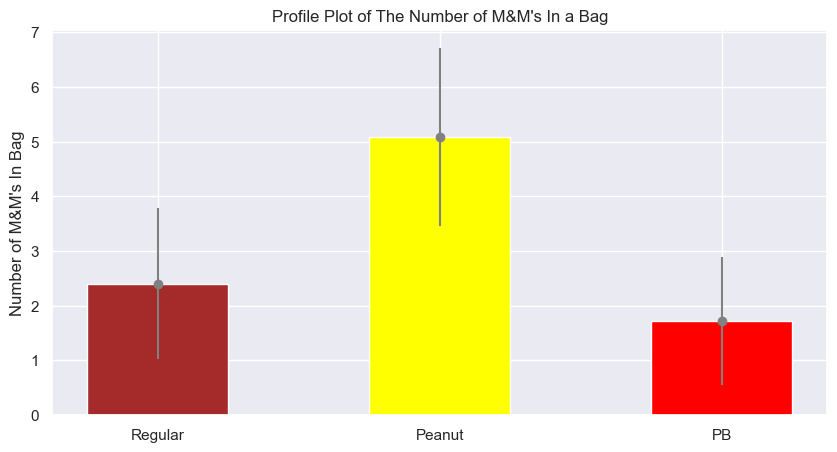


An analysis of variance showed that the effect of type of M&M's was significant, F(2,72) = 39.76, p < 0.001,
on the number of blues in a bag. Post hoc analyses using Fisher's LSD indicated that peanut M&M's
had significantly more blues in the bag (M = 5.08, SD = 1.63) compared to regular M&M's (M = 2.40, SD = 1.38)
and the peanut butter (PB) M&M's (M = 1.72, SD = 1.17).


In [201]:
data = {'Regular':Bls_in_R.mean(), 'Peanut':Bls_in_P.mean(), 'PB':Bls_in_PB.mean()}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(courses[0], values[0], color ='brown', width = 0.5)
plt.bar(courses[1], values[1], color ='yellow', width = 0.5)
plt.bar(courses[2], values[2], color ='red', width = 0.5)

std_R = 1.384437
std_P = 1.630951
std_PB = 1.173314

plt.errorbar(courses[0], values[0], yerr=std_R, fmt="o", color="grey")
plt.errorbar(courses[1], values[1], yerr=std_P, fmt="o", color="grey")
plt.errorbar(courses[2], values[2], yerr=std_PB, fmt="o", color="grey")

plt.ylabel('Number of M&M\'s In Bag')
plt.title('Profile Plot of The Number of M&M\'s In a Bag')
plt.show()

print()
print('An analysis of variance showed that the effect of type of M&M\'s was significant, F(2,72) = 39.76, p < 0.001,')
print('on the number of blues in a bag. Post hoc analyses using Fisher\'s LSD indicated that peanut M&M\'s')
print('had significantly more blues in the bag (M = 5.08, SD = 1.63) compared to regular M&M\'s (M = 2.40, SD = 1.38)')
print('and the peanut butter (PB) M&M\'s (M = 1.72, SD = 1.17).')

In [202]:
Types_of_MnMs_13b = pd.read_csv('Types_of_MnMs_13b.csv')

In [203]:
Types_of_MnMs_13b

,Type,Number of M&Ms In A Bag (x),Number of Blues (y)
0,Regular,16,2
1,Regular,15,2
2,Regular,14,3
3,Regular,16,1
4,Regular,16,1
...,...,...,...
70,PB,19,1
71,PB,12,2
72,PB,16,3
73,PB,19,2


In [204]:
Types_of_MnMs_13b.columns = ['Type', 'Number of M&Ms In A Bag (x)', 'Number of Blues (y)']

In [206]:
x = Types_of_MnMs_13b['Number of M&Ms In A Bag (x)']
y = Types_of_MnMs_13b['Number of Blues (y)']

model = smf.ols(formula='x ~ y', data=Types_of_MnMs_13b).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      x   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     6.463
Date:                Wed, 22 May 2024   Prob (F-statistic):             0.0131
Time:                        19:55:46   Log-Likelihood:                -168.08
No. Observations:                  75   AIC:                             340.2
Df Residuals:                      73   BIC:                             344.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.5703      0.487     31.964      0.0

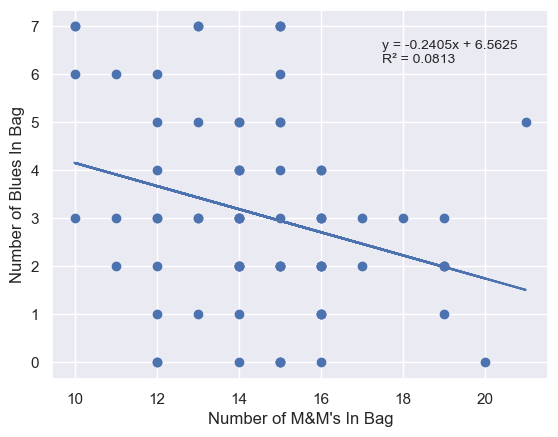


A simple linear regression was used to test if number of M&M's in a bag significantly predicted
number of blues in a bag. The results of the regression indicated the model explained 8.13% of the variance
(R2 = 0.0813, F(1,73) = 6.46, p < 0.10). It was found that number of M&M's in a bag significantly predicted
number of blues in a bag (β = -0.24, p < 0.10).


In [207]:
slope, intercept, r, p, std_err = stats.linregress(x, y)

def func(x):
  return slope * x + intercept

model = list(map(func, x))

plt.scatter(x, y)
plt.plot(x, model)
plt.xlabel('Number of M&M\'s In Bag')
plt.ylabel('Number of Blues In Bag')
plt.text(17.5, 6.25, 'y = -0.2405x + 6.5625\nR² = 0.0813', fontsize = 10)
plt.show()

print()
print('A simple linear regression was used to test if number of M&M\'s in a bag significantly predicted')
print('number of blues in a bag. The results of the regression indicated the model explained 8.13% of the variance')
print('(R2 = 0.0813, F(1,73) = 6.46, p < 0.10). It was found that number of M&M\'s in a bag significantly predicted')
print('number of blues in a bag (β = -0.24, p < 0.10).')